In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils.visualize as viz
from utils.ode import map_equation, hydrogen_bromine, hydrogen_bromine_init

%load_ext autoreload
%autoreload 2

In [2]:
dt = 0.002
visualize = viz.ODEResultVisualizer(
    fun=hydrogen_bromine,
    x0=hydrogen_bromine_init,
    t=np.arange(0, 1e1, dt),
    result_dir="../experiments/results/hbr_debias_20251002-122823",
    labels=["Br2", "Br", "H2", "H", "HBr", "M"],
)
visualize.solve()

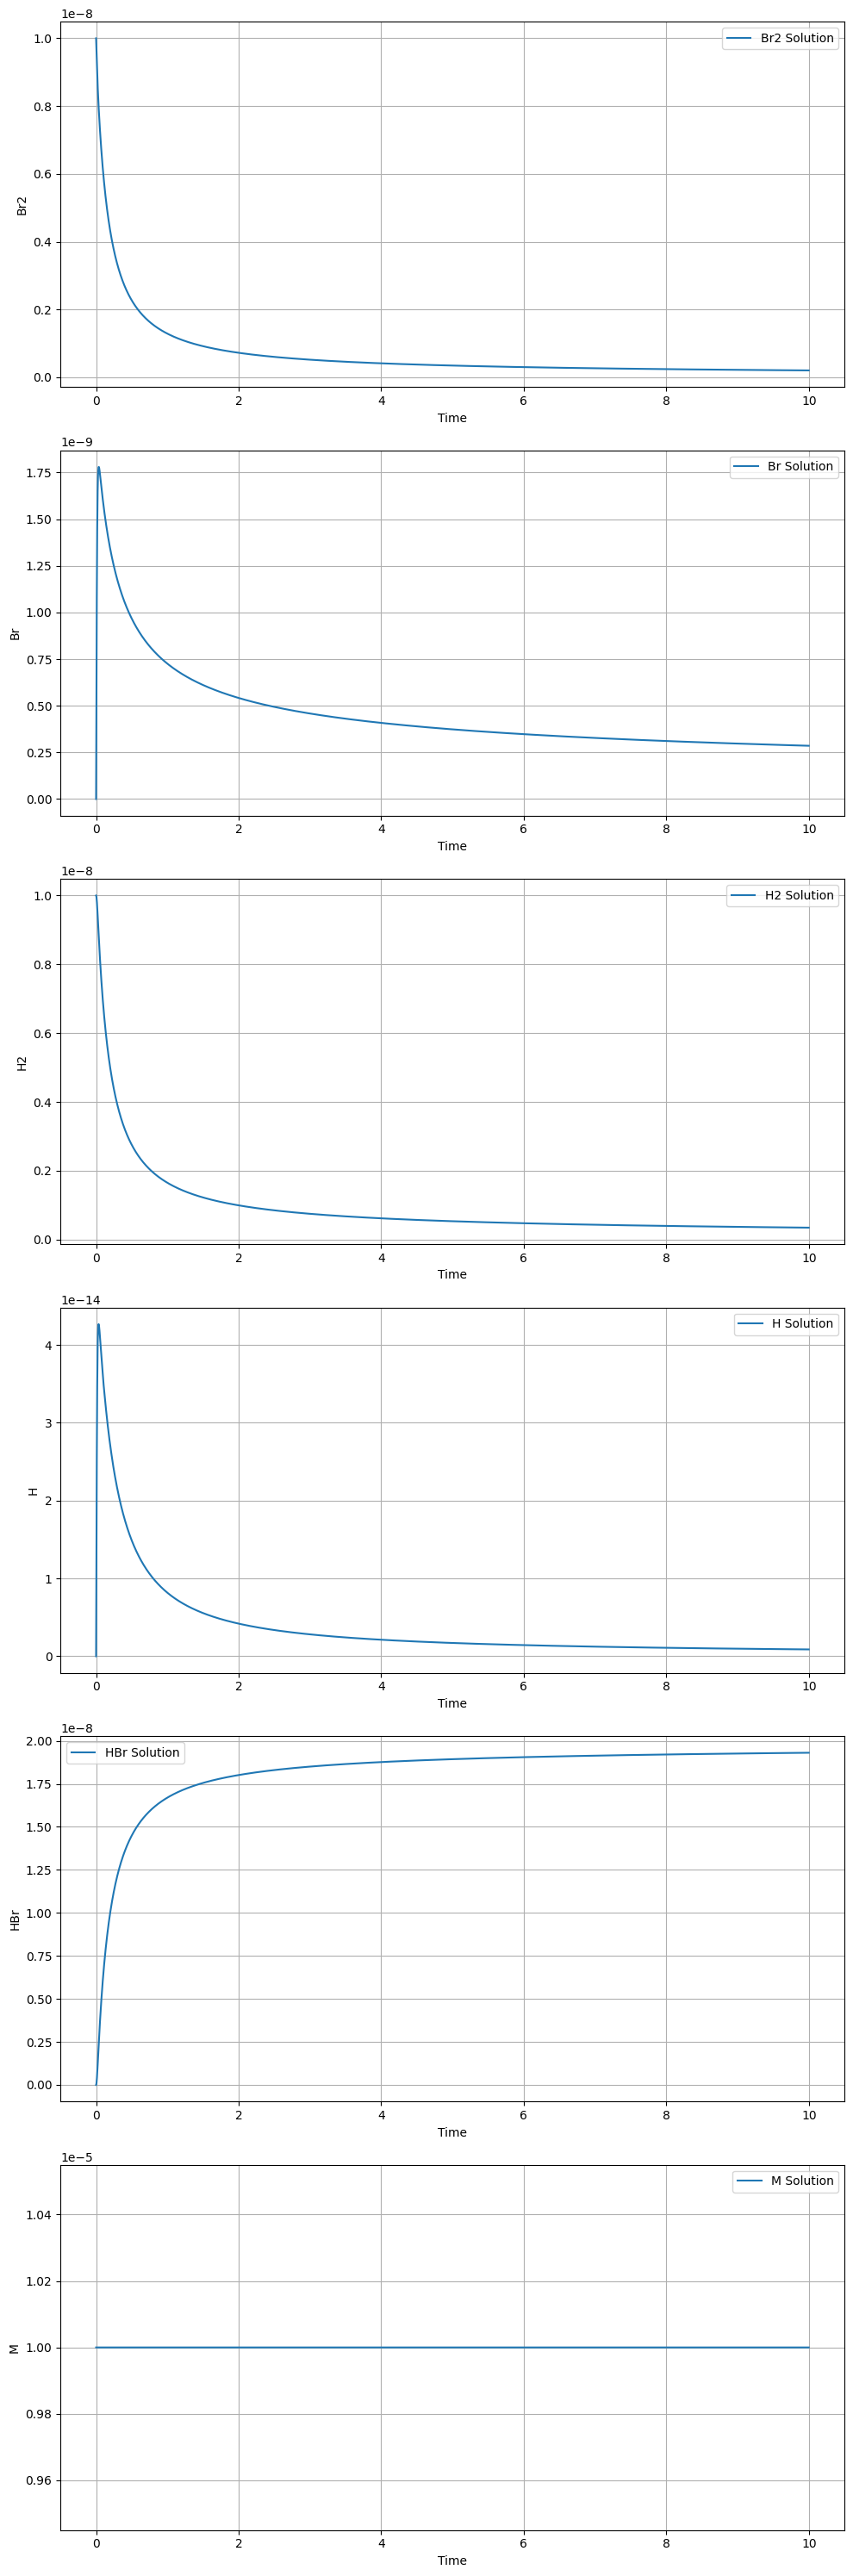

In [3]:
visualize.plot_solution()

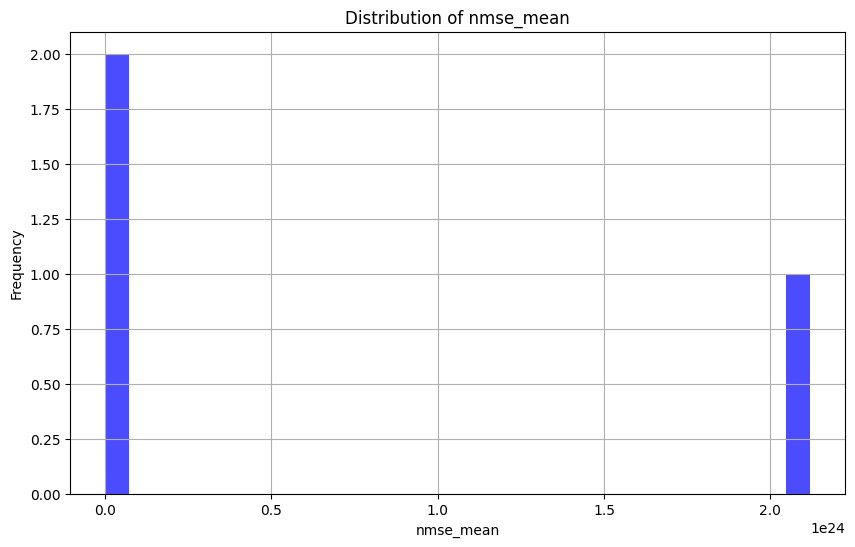

In [4]:
visualize.plot_metric_distribution('nmse_mean')

In [5]:
df = visualize.results_df
df.to_csv('temp_data.csv', index=False)

Heatmap saved to heatmap_model_alpha_weight_eps_nmse_mean.png


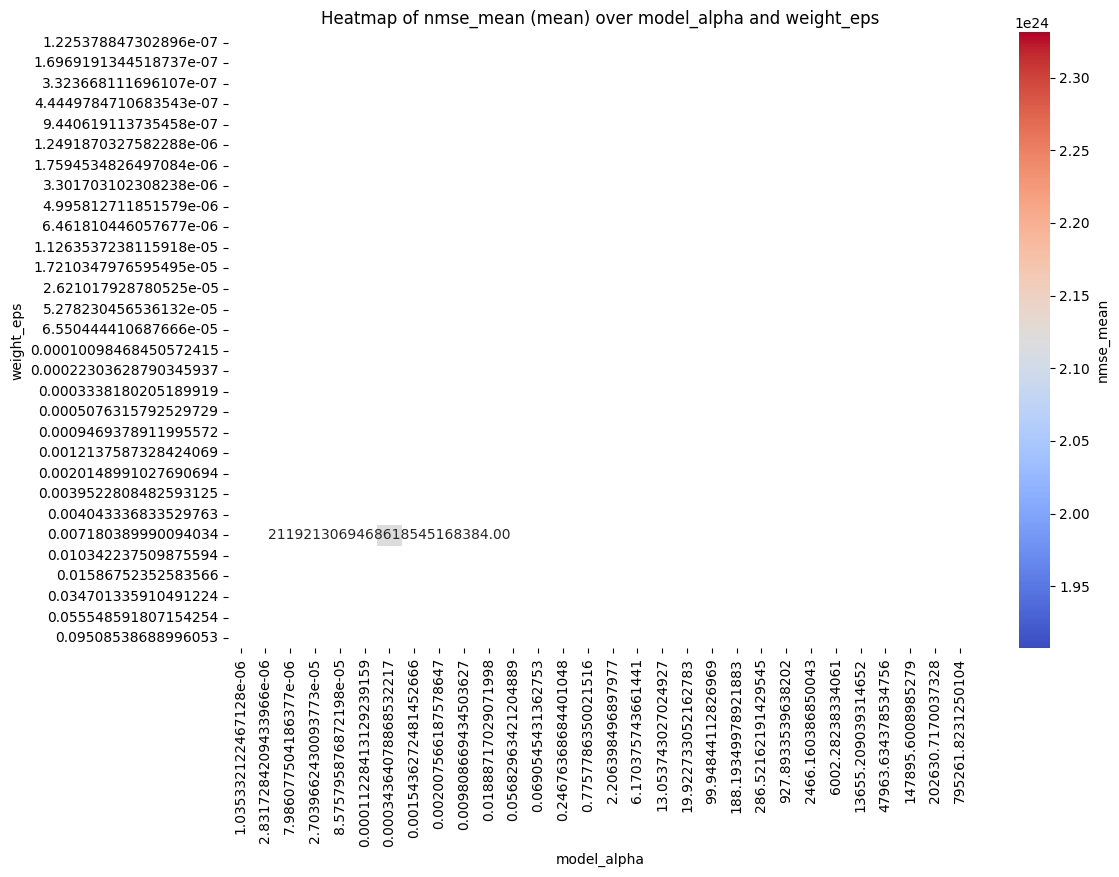

In [6]:
visualize.plot_parameter_heatmap(
    param_x="model_alpha",
    param_y="weight_eps",
    metric="nmse_mean",
    fixed_params={'weight_std': 1e-5},
    save=True
)

In [7]:
visualize.get_best_model('nmse_mean', fixed_params={'weight_std': 1e-5})

model                                   75_model
nmse_0                     275562421609153.90625
nmse_1                              18381.120596
nmse_2                     163571806083946.21875
nmse_3                            51470012.68066
nmse_4                      371982453549312320.0
nmse_5              12715278044390122925850624.0
nmse_mean            2119213069468618545168384.0
data_file               hydrogen_bromine_ode.csv
equation                        hydrogen_bromine
debias_threshold                             1e2
model_alpha                             0.000344
weight_eps                               0.00718
weight_std                               0.00001
Name: 119, dtype: object

Solution plot saved to solution_75_model_Br2.png


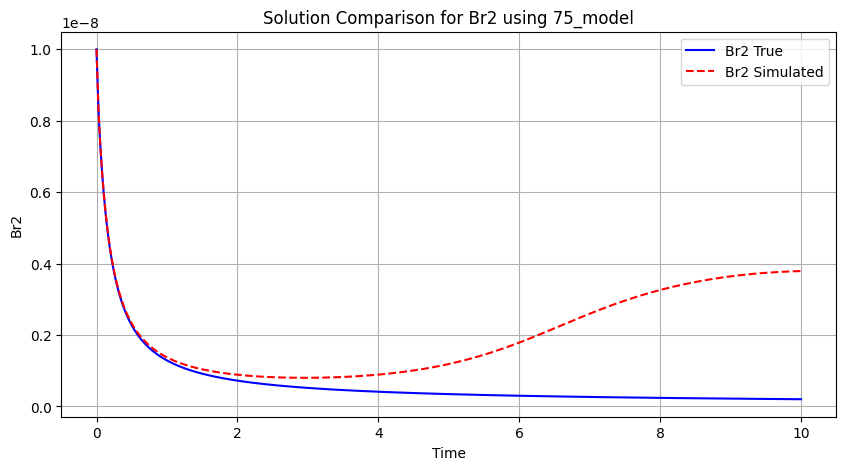

Solution plot saved to solution_75_model_Br.png


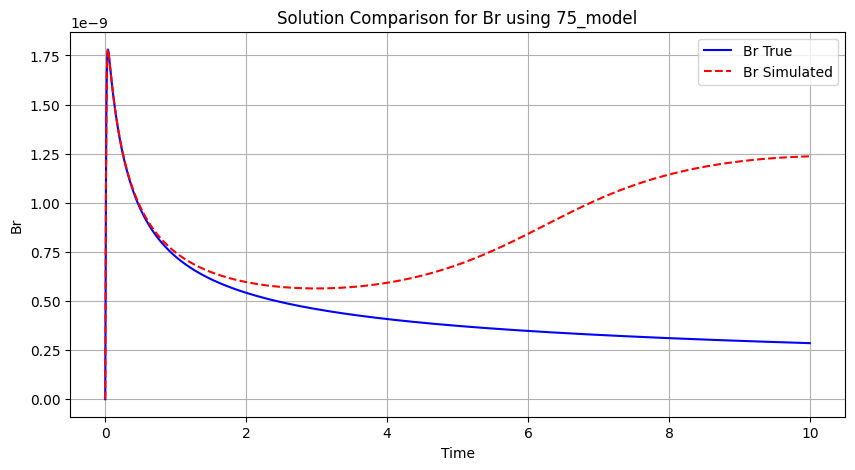

Solution plot saved to solution_75_model_H2.png


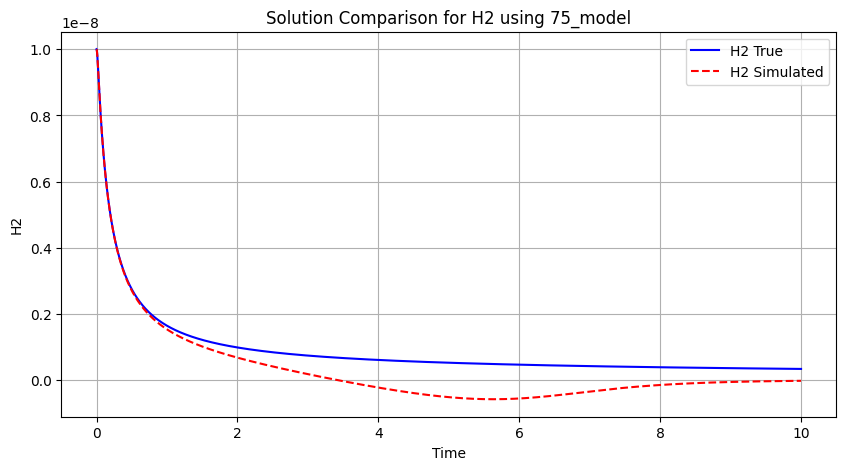

Solution plot saved to solution_75_model_H.png


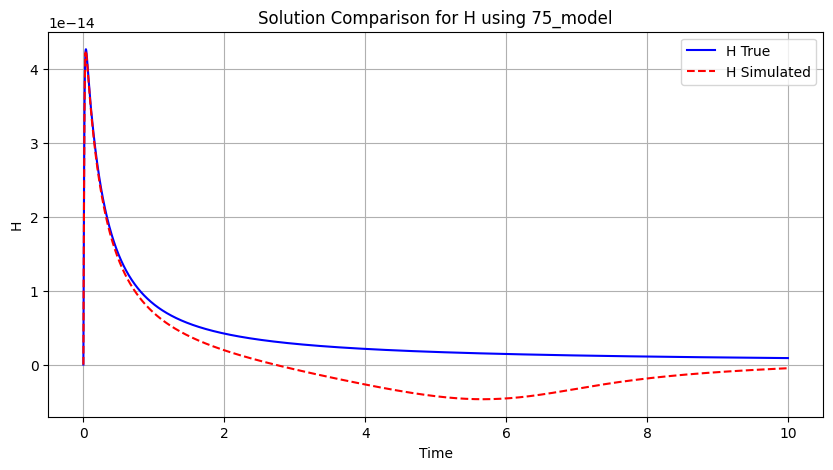

Solution plot saved to solution_75_model_HBr.png


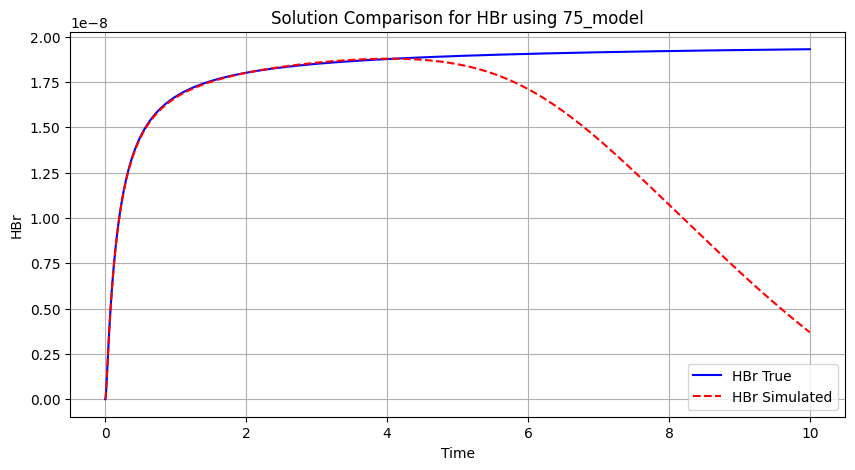

Solution plot saved to solution_75_model_M.png


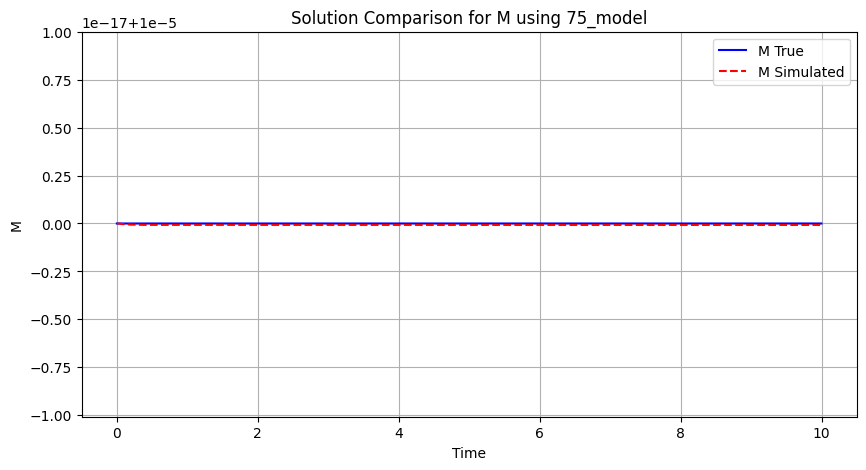

In [8]:
visualize.plot_best_model_solution('nmse_mean', fixed_params={'weight_std': 1e-5}, save=True)

Coefficient plot saved to coefficients_75_model.png


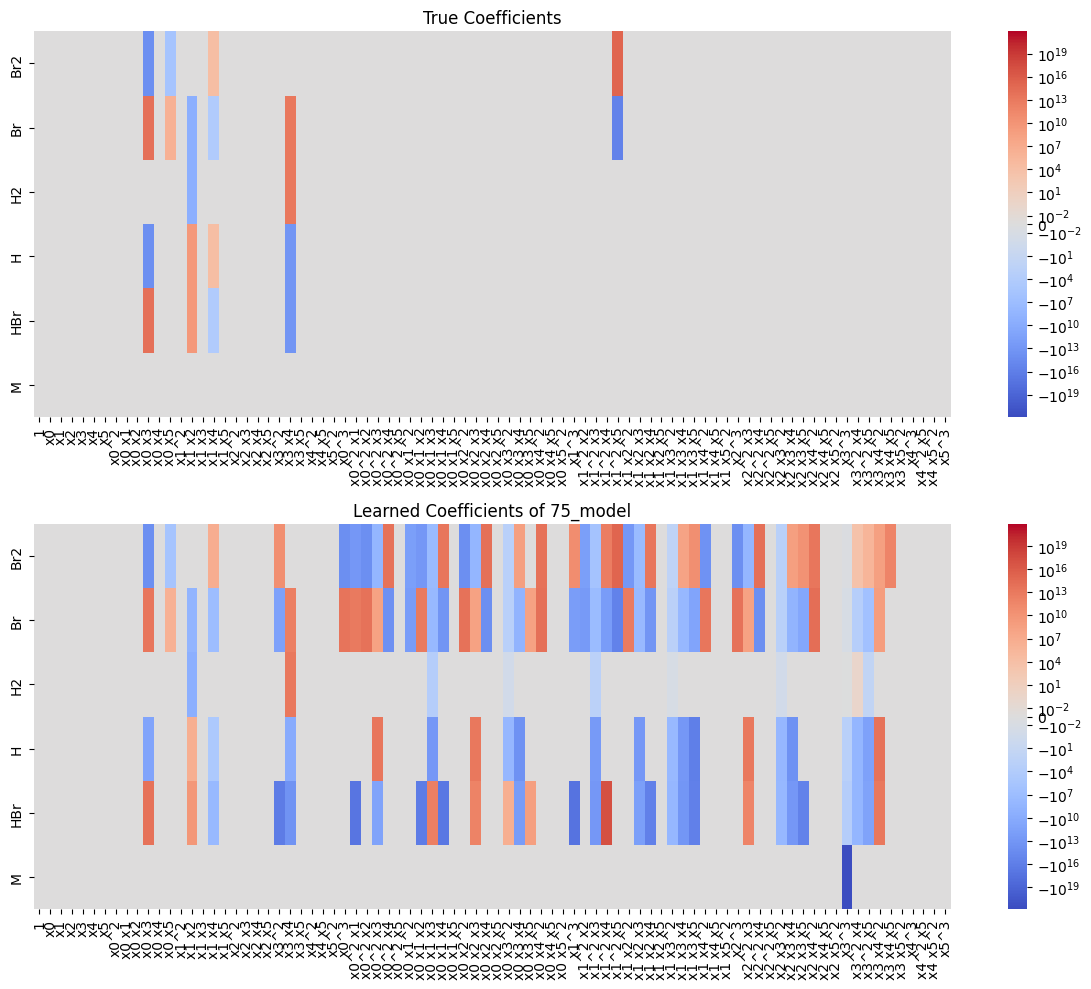

In [9]:
visualize.plot_best_model_coefficients('nmse_mean', fixed_params={'weight_std': 1e-5}, save=True)